### Name: Solongo Manlaibaatar
### Student number : 2025076
### Integrated CA2

### Abstract

The dataset used in this project is an e-commerce product catalogue containing 12,615 entries and 15 attributes related to beauty and perfume products. Each row represents a unique product listing sourced from multiple online retail websites. The attributes include product details, pricing information, metadata, and customer engagement indicators.

### Load  the data

In [866]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [868]:
df = pd.read_csv("ECommerce.csv")
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [870]:
df.shape


(12615, 15)

In [872]:
df.describe()

,price
count,12298.000000
mean,2281.180935
std,3158.690307
min,1.700000
25%,499.000000
50%,1307.200000
75%,2859.500000
max,94099.000000


In [874]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [876]:
df.isnull().sum()

product_name       0
website            0
country            0
category           0
subcategory        0
title-href         0
price            317
brand              0
ingredients     6015
form               0
type            2681
color           1989
size            3166
rating          2067
noofratings      459
dtype: int64

In [878]:
df.duplicated().sum()

60

### Data cleaning

In [881]:
df.replace('NAN', pd.NA, inplace=True)
df = df.dropna()

In [883]:
df.isnull().sum()


product_name    0
website         0
country         0
category        0
subcategory     0
title-href      0
price           0
brand           0
ingredients     0
form            0
type            0
color           0
size            0
rating          0
noofratings     0
dtype: int64

In [885]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print("Duplicates after cleaning:", df.duplicated().sum())



Duplicates after cleaning: 0


In [887]:
### EDA analysis

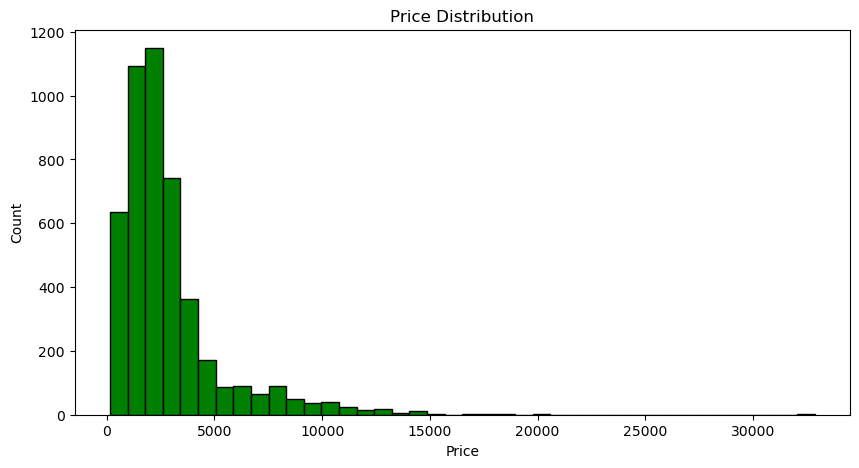

In [889]:
plt.figure(figsize=(10,5))
plt.hist(df['price'].dropna(), bins=40, color='green', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

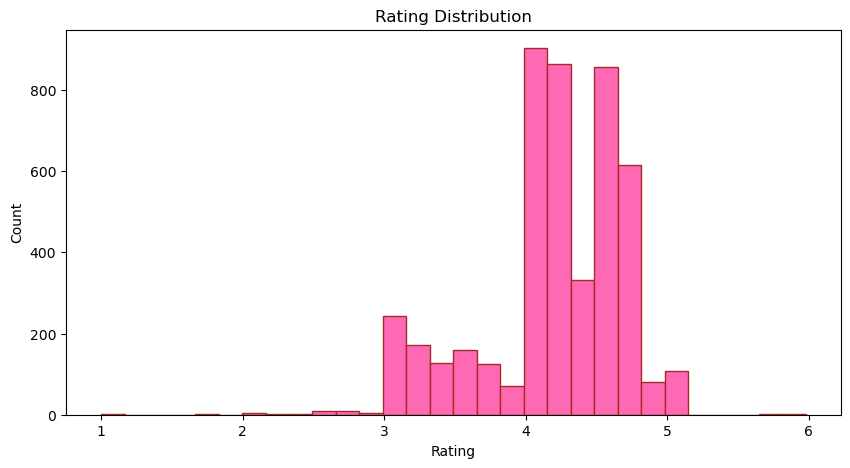

In [890]:
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(10,5))
plt.hist(df['rating_num'].dropna(), bins=30, color= 'hotpink', edgecolor='brown')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

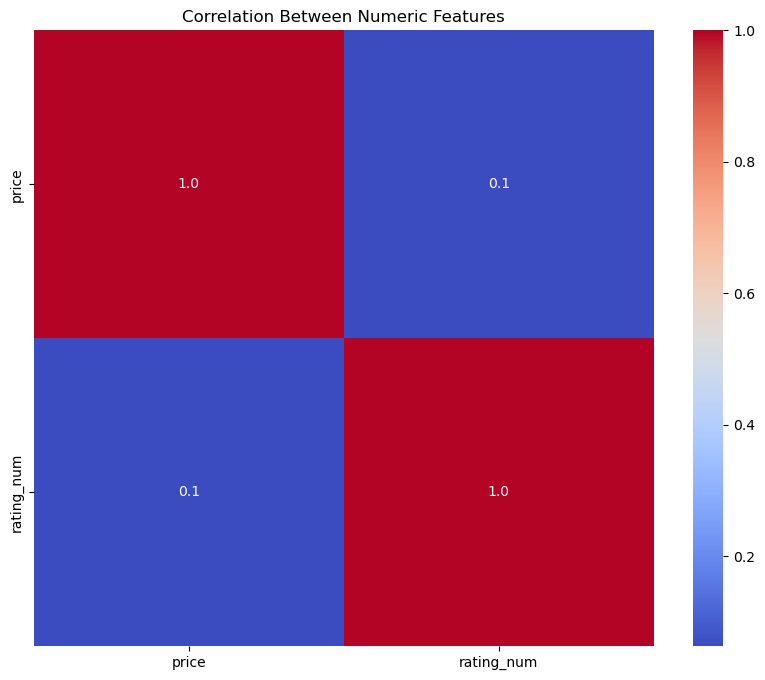

In [893]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

### What are the top 10 brand?

In [896]:
top10_brands = df['brand'].value_counts().head(10)

print(top10_brands)

brand
Sephora Collection         302
Anastasia Beverly Hills    126
Too Faced                  113
Smashbox                    95
Benefit Cosmetics           90
MAC Cosmetics               86
HUDA BEAUTY                 84
Dior                        81
Clinique                    81
SHISEIDO                    78
Name: count, dtype: int64


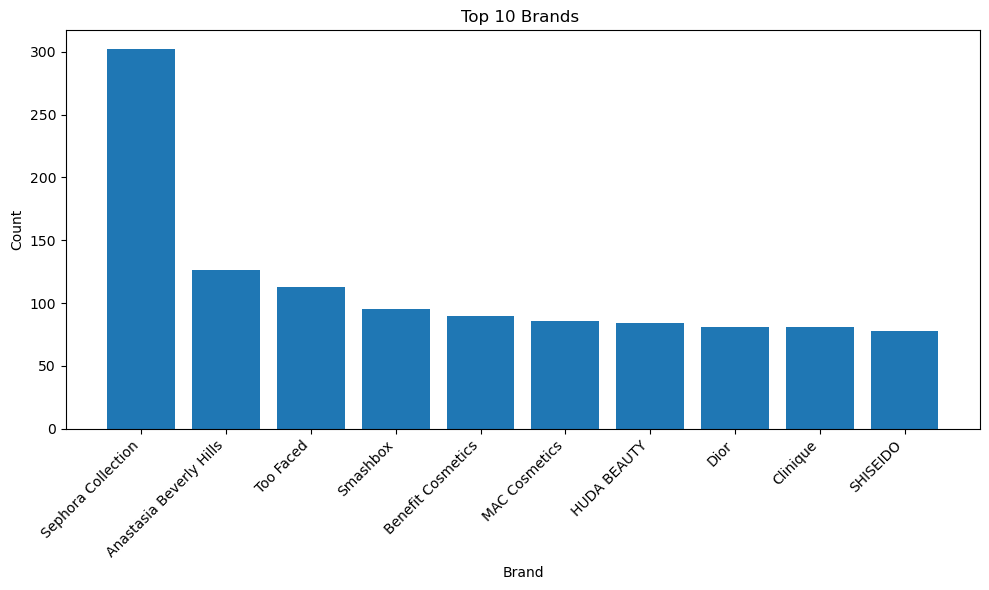

In [898]:
plt.figure(figsize=(10,6))
plt.bar(top10_brands.index, top10_brands.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands ")
plt.tight_layout()
plt.show()

In [900]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Correlation
corr = df[['price', 'rating']].corr()
print(corr)

           price    rating
price   1.000000  0.063229
rating  0.063229  1.000000


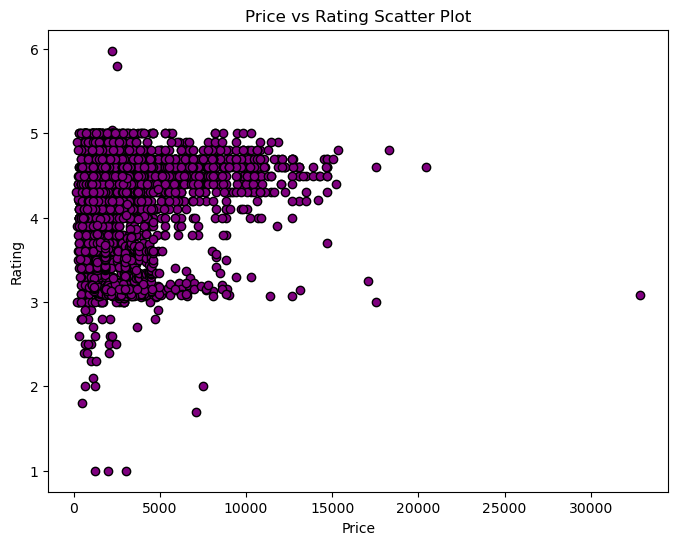

In [902]:
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['rating'], color='purple', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating Scatter Plot")
plt.show()

## Best 5 Categories Based on Average Rating:

In [905]:

best5_avg_rating = (
    df.groupby('category')['rating_num']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print("Best 5 Categories by Average Rating:")
print(best5_avg_rating)

Best 5 Categories by Average Rating:
category
skincare    4.448279
body        4.417076
hair        4.351345
lips        4.228129
eyes        4.121476
Name: rating_num, dtype: float64


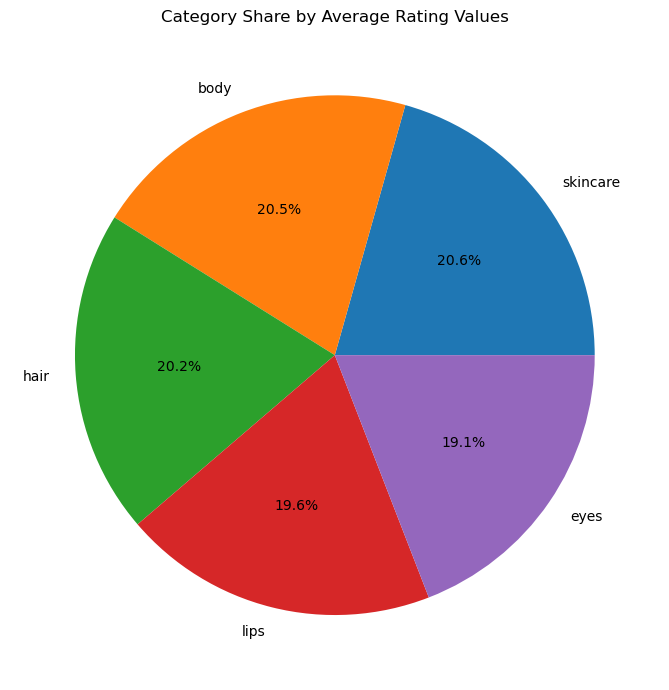

In [907]:
categories = ["skincare", "body", "hair", "lips", "eyes"]
ratings = [4.448279, 4.417076, 4.351345, 4.228129, 4.121476]
plt.figure(figsize=(7,7))
plt.pie(ratings, labels=categories, autopct='%1.1f%%')
plt.title("Category Share by Average Rating Values")
plt.tight_layout()
plt.show()

### Price Comparison Across Best 5 Categories

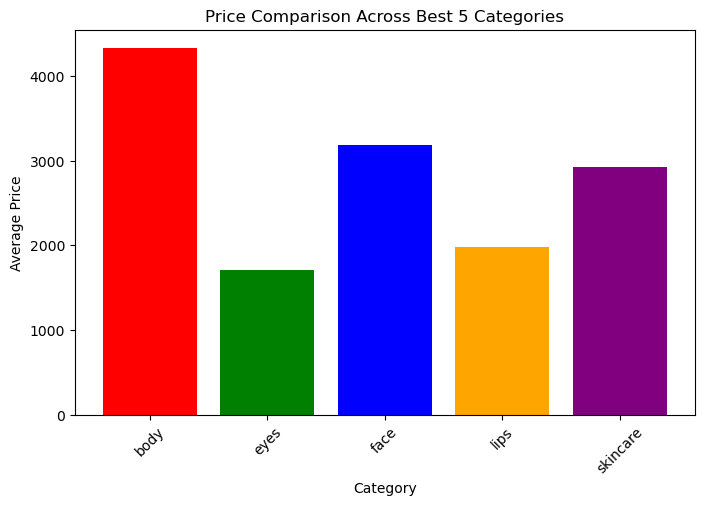

In [910]:
df['price_num'] = pd.to_numeric(df['price'], errors='coerce')


top5_categories = df['category'].value_counts().head(5).index

avg_price = (
    df[df['category'].isin(top5_categories)]
    .groupby('category')['price_num']
    .mean()
)
colors = ['red', 'green', 'blue', 'orange', 'purple']


plt.figure(figsize=(8,5))
plt.bar(avg_price.index, avg_price.values, color=colors)
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.title("Price Comparison Across Best 5 Categories")
plt.xticks(rotation=45)
plt.show()

In [912]:
top5_subcat = df['subcategory'].value_counts().head(5)
print(top5_subcat)

subcategory
perfume     561
serum       424
bodywash    400
lipstick    376
blush       333
Name: count, dtype: int64


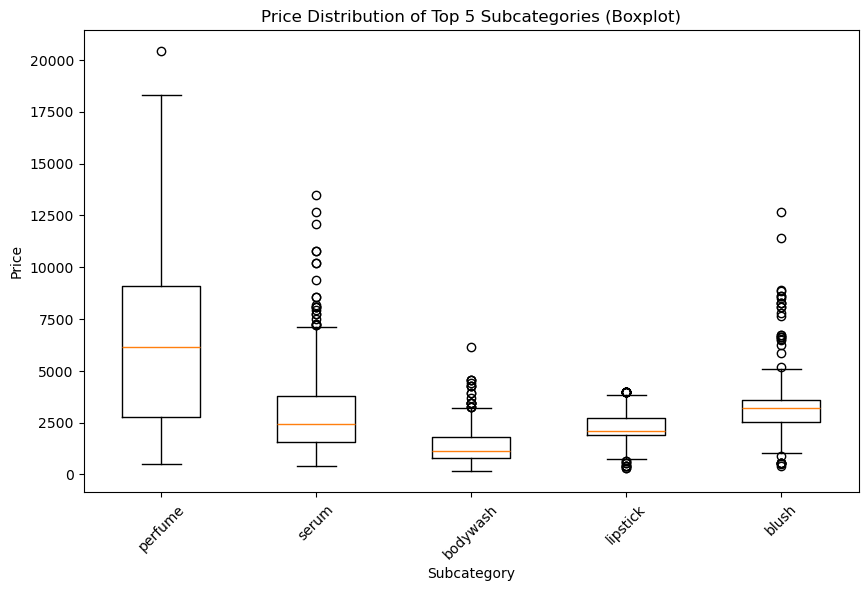

In [918]:
top5_subcat = df['subcategory'].value_counts().head(5).index
sub_df = df[df['subcategory'].isin(top5_subcat)].copy()

sub_df['price_num'] = pd.to_numeric(sub_df['price'], errors='coerce')

# Create boxplot
plt.figure(figsize=(10,6))
plt.boxplot([sub_df[sub_df['subcategory'] == sub]['price_num'].dropna() for sub in top5_subcat],
            labels=top5_subcat)

plt.title("Price Distribution of Top 5 Subcategories (Boxplot)")
plt.xlabel("Subcategory")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [930]:
df = pd.read_csv("ECommerce.csv")
top3 = df['website'].value_counts().head(3)

print(top3)


website
Amazon     4749
ulta       3707
Sephora    2917
Name: count, dtype: int64


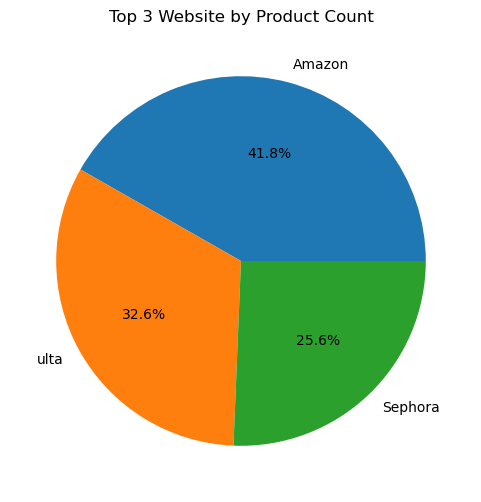

In [932]:
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(top3, labels=top3.index, autopct='%1.1f%%')
plt.title('Top 3 Website by Product Count')
plt.show()

In [934]:
product_count = df["country"].value_counts()
print("Product Count by Country:")
print(product_count)
print()

Product Count by Country:
country
India    8908
USA      3707
Name: count, dtype: int64



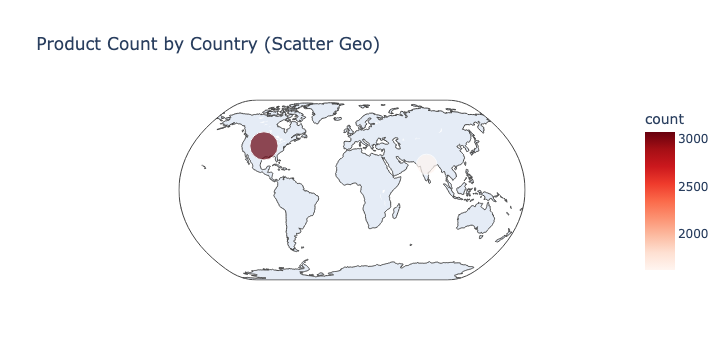

In [936]:
import plotly.express as px


df = pd.DataFrame({
    "country": ["USA", "India"],
    "count": [3072, 1623]
})

fig = px.scatter_geo(
    df,
    locations="country",
    locationmode="country names",
    size="count",
    color="count",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Product Count by Country (Scatter Geo)"
)

fig.show()

In [938]:
avg_price = df.groupby("country")["price"].mean()
print("Average Price by Country:")
print(avg_price)
print()

KeyError: 'Column not found: price'

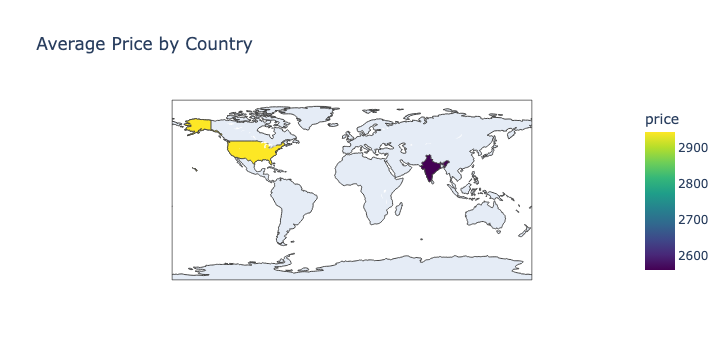

In [940]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "country": ["India", "USA"],
    "price": [2559.256932, 2945.576566]
})

ig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="price",
    color_continuous_scale="Viridis",
    title="Average Price by Country"
)

ig.show()

### CONTENT-BASED FILTERING (ITEM–ITEM) USING PRODUCT FEATURES

In [943]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from scipy.sparse import hstack, csr_matrix


In [951]:
products = pd.read_csv("ECommerce.csv")

print(products.columns.tolist())

['product_name', 'website', 'country', 'category', 'subcategory', 'title-href', 'price', 'brand', 'ingredients', 'form', 'type', 'color', 'size', 'rating', 'noofratings']


In [953]:
text_data = (
    products['product_name'].fillna('') + ' ' +
    products['ingredients'].fillna('')
)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
desc_tfidf = tfidf.fit_transform(text_data)


cat_cols = ['category', 'subcategory', 'brand', 'form', 'type', 'color', 'size']
cat_features = products[cat_cols].fillna('unknown')

oh = OneHotEncoder(handle_unknown='ignore')
cat_oh = oh.fit_transform(cat_features)


scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(products[['price']].fillna(products['price'].median()))
price_sparse = csr_matrix(price_scaled)


item_matrix = hstack([desc_tfidf, cat_oh, price_sparse])


item_index = {name: idx for idx, name in enumerate(products['product_name'])}

In [955]:
def recommend_similar_items_content_based(product_name, k=10):
    if product_name not in item_index_cb:
        raise ValueError(f"{product_name} not found")

    idx = item_index_cb[product_name]
    target_vec = item_matrix[idx]

    sims = cosine_similarity(target_vec, item_matrix).flatten()
    similar_idx = np.argsort(-sims)
    similar_idx = [i for i in similar_idx if i != idx][:k]

    recs = products.iloc[similar_idx][['product_name', 'brand', 'category', 'price']]
    recs = recs.copy()
    recs['similarity'] = sims[similar_idx]
    return recs

In [957]:
products['rating'] = pd.to_numeric(products['rating'], errors='coerce')
products['noofratings'] = pd.to_numeric(products['noofratings'], errors='coerce')

In [959]:
N_USERS = 500
MAX_PER_ITEM = 50

np.random.seed(42)
user_ids = np.arange(1, N_USERS + 1)

rows = []

for _, row in products.iterrows():
    item_id = row['product_name']
    avg_rating = row['rating']
    count = row['noofratings']

    if pd.isna(avg_rating) or pd.isna(count) or count <= 0:
        continue

    n = int(min(count, MAX_PER_ITEM))
    if n == 0:
        continue

    chosen_users = np.random.choice(user_ids, size=n, replace=False)

    for u in chosen_users:
        noise = np.random.normal(0, 0.4)
        r = float(np.clip(avg_rating + noise, 1.0, 5.0))
        rows.append((u, item_id, r))

ratings_cf = pd.DataFrame(rows, columns=['user_id', 'item_id', 'rating'])

print(ratings_cf.head())
print("Users:", ratings_cf['user_id'].nunique(), "Items:", ratings_cf['item_id'].nunique(), "Rows:", len(ratings_cf))

   user_id                                            item_id    rating
0      362  Carlton London Incense Eau da parfum, Premium ...  3.900725
1       74  Carlton London Incense Eau da parfum, Premium ...  4.202374
2      375  Carlton London Incense Eau da parfum, Premium ...  4.673417
3      156  Carlton London Incense Eau da parfum, Premium ...  4.065550
4      105  Carlton London Incense Eau da parfum, Premium ...  4.127107
Users: 500 Items: 8132 Rows: 286527


 ### Build the user–item matrix R

In [961]:
users = ratings_cf['user_id'].unique()
items = ratings_cf['item_id'].unique()

user_index_cf = {u: i for i, u in enumerate(users)}
item_index_cf = {it: j for j, it in enumerate(items)}

R = np.full((len(users), len(items)), np.nan)

for row in ratings_cf.itertuples():
    ui = user_index_cf[row.user_id]
    ii = item_index_cf[row.item_id]
    R[ui, ii] = row.rating

### User–user collaborative filtering

In [965]:
def cosine_sim_users(a, b):
    mask = ~np.isnan(a) & ~np.isnan(b)
    if mask.sum() == 0:
        return 0.0
    a_m = a[mask]
    b_m = b[mask]
    denom = (np.linalg.norm(a_m) * np.linalg.norm(b_m))
    if denom == 0:
        return 0.0
    return float(np.dot(a_m, b_m) / denom)

In [967]:
def predict_user_user(u_idx, i_idx, R, k=20):
    target_user_vector = R[u_idx, :]

    # users who rated this item
    users_who_rated = np.where(~np.isnan(R[:, i_idx]))[0]
    if len(users_who_rated) == 0:
        return np.nan

    sims = []
    for v in users_who_rated:
        if v == u_idx:
            continue
        s = cosine_sim_users(target_user_vector, R[v, :])
        if s > 0:
            sims.append((v, s))

    if not sims:
        return np.nan

    sims.sort(key=lambda x: x[1], reverse=True)
    sims = sims[:k]

    num, den = 0.0, 0.0
    for v, s in sims:
        r_vi = R[v, i_idx]
        num += s * r_vi
        den += abs(s)

    if den == 0:
        return np.nan
    return num / den

In [969]:

def cosine_sim_items(i_vec, j_vec):
    mask = ~np.isnan(i_vec) & ~np.isnan(j_vec)
    if mask.sum() == 0:
        return 0.0
    a = i_vec[mask]
    b = j_vec[mask]
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    if denom == 0:
        return 0.0
    return float(np.dot(a, b) / denom)

In [971]:
def predict_item_item(u_idx, i_idx, R, k=20):
    user_ratings = R[u_idx, :]
    rated_items = np.where(~np.isnan(user_ratings))[0]
    if len(rated_items) == 0:
        return np.nan

    target_item_vector = R[:, i_idx]

    sims = []
    for j in rated_items:
        s = cosine_sim_items(target_item_vector, R[:, j])
        if s > 0:
            sims.append((j, s))

    if not sims:
        return np.nan

    sims.sort(key=lambda x: x[1], reverse=True)
    sims = sims[:k]

    num, den = 0.0, 0.0
    for j, s in sims:
        r_uj = R[u_idx, j]
        num += s * r_uj
        den += abs(s)

    if den == 0:
        return np.nan
    return num / den

In [973]:
def train_test_split_ratings(ratings_df, test_frac=0.2, min_test_items=1, random_state=42):
    rng = np.random.default_rng(random_state)
    train_rows = []
    test_rows = []

    for user, group in ratings_df.groupby('user_id'):
        n = len(group)
        if n <= 1:
            train_rows.append(group)
            continue

        n_test = max(min_test_items, int(n * test_frac))
        n_test = min(n_test, n - 1)

        test_idx = rng.choice(group.index, size=n_test, replace=False)
        test_rows.append(group.loc[test_idx])
        train_rows.append(group.drop(test_idx))

    train = pd.concat(train_rows).reset_index(drop=True)
    test = pd.concat(test_rows).reset_index(drop=True)
    return train, test

train_r, test_r = train_test_split_ratings(ratings_cf)
len(train_r), len(test_r)

(229422, 57105)

In [975]:
def build_matrix(ratings_df):
    users = ratings_df['user_id'].unique()
    items = ratings_df['item_id'].unique()
    user_index = {u: i for i, u in enumerate(users)}
    item_index = {it: j for j, it in enumerate(items)}
    R = np.full((len(users), len(items)), np.nan)
    for row in ratings_df.itertuples():
        ui = user_index[row.user_id]
        ii = item_index[row.item_id]
        R[ui, ii] = row.rating
    return R, user_index, item_index

R_train, uidx_train, iidx_train = build_matrix(train_r)

In [977]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [979]:
def evaluate_cf(R, user_index, item_index, test_data, predict_fn):
    y_true, y_pred = [], []

    for row in test_data.itertuples():
        u = row.user_id
        i = row.item_id
        if u not in user_index or i not in item_index:
            continue

        u_idx = user_index[u]
        i_idx = item_index[i]
        r_hat = predict_fn(u_idx, i_idx, R)
        if np.isnan(r_hat):
            continue

        y_true.append(row.rating)
        y_pred.append(r_hat)

    if not y_true:
        return None, None, 0

    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae, len(y_true)

rmse_user, mae_user, n_user = evaluate_cf(R_train, uidx_train, iidx_train, test_r, predict_user_user)
rmse_item, mae_item, n_item = evaluate_cf(R_train, uidx_train, iidx_train, test_r, predict_item_item)

print("User–user CF:  RMSE =", rmse_user, "MAE =", mae_user, "Test points =", n_user)
print("Item–item CF:  RMSE =", rmse_item, "MAE =", mae_item, "Test points =", n_item)

User–user CF:  RMSE = 0.39590295104993267 MAE = 0.3176110279272399 Test points = 57015
Item–item CF:  RMSE = 0.5633804607677835 MAE = 0.44963390189771263 Test points = 57015


### MARKET-BASKET DATA

In [981]:
from collections import Counter, defaultdict
from itertools import combinations

In [982]:
if "subcategory" in df.columns:
    most_common_subcat = df["subcategory"].mode()[0]
    sub_df = df[df["subcategory"] == most_common_subcat].copy()
else:
    sub_df = df.copy()

# Take first 60 products to keep things small
sub_df = sub_df.head(60).reset_index(drop=True)

print("Number of products used:", len(sub_df))


Number of products used: 2


In [983]:
print(df.columns)

Index(['country', 'price'], dtype='object')


In [984]:
products = [
    "Perfume_A_BrandX",
    "Perfume_B_BrandX",
    "BodySpray_A_BrandX",
    "Perfume_C_BrandY",
    "Deodorant_A_BrandY",
    "Perfume_D_BrandZ",
    "Lotion_A_BrandZ",
    "Perfume_E_BrandZ",
    "GiftSet_A_Mix",
    "GiftSet_B_Mix",
]

In [985]:
brand_map = {
    "Perfume_A_BrandX": "BrandX",
    "Perfume_B_BrandX": "BrandX",
    "BodySpray_A_BrandX": "BrandX",
    "Perfume_C_BrandY": "BrandY",
    "Deodorant_A_BrandY": "BrandY",
    "Perfume_D_BrandZ": "BrandZ",
    "Lotion_A_BrandZ": "BrandZ",
    "Perfume_E_BrandZ": "BrandZ",
    "GiftSet_A_Mix": "Mix",
    "GiftSet_B_Mix": "Mix",
}

In [986]:
brand_to_products = defaultdict(list)
for p in products:
    brand_to_products[brand_map[p]].append(p)

num_transactions = 200
min_items, max_items = 2, 6

transactions = []
for _ in range(num_transactions):
    # choose a dominant brand
    brands = list(brand_to_products.keys())
    # weight by number of products in each brand
    weights = np.array([len(brand_to_products[b]) for b in brands], dtype=float)
    weights /= weights.sum()
    main_brand = np.random.choice(brands, p=weights)

    basket_size = np.random.randint(min_items, max_items + 1)

    # start with products from main brand
    candidates = brand_to_products[main_brand].copy()
    np.random.shuffle(candidates)

    if len(candidates) >= basket_size:
        basket = candidates[:basket_size]
    else:
        # fill remaining slots with random from other brands
        remaining = list(set(products) - set(candidates))
        np.random.shuffle(remaining)
        basket = candidates + remaining[:basket_size - len(candidates)]

    transactions.append(basket)

print("Example transaction:", transactions[0])


Example transaction: ['GiftSet_B_Mix', 'GiftSet_A_Mix', 'BodySpray_A_BrandX']


In [987]:
def apriori(transactions, min_support=0.1, max_len=3):
    num_txn = len(transactions)
    item_counts = Counter()
    for t in transactions:
        item_counts.update(set(t))
    freq_itemsets = {}
    Lk = {(item,): count / num_txn for item, count in item_counts.items()
          if count / num_txn >= min_support}
    freq_itemsets.update(Lk)
    k = 2
    current_Lk = Lk
    while current_Lk and k <= max_len:
        items_prev = list(current_Lk.keys())
        candidates = set()
        for i in range(len(items_prev)):
            for j in range(i + 1, len(items_prev)):
                a, b = items_prev[i], items_prev[j]
                union = tuple(sorted(set(a) | set(b)))
                if len(union) == k:
                    valid = True
                    for subset in combinations(union, k - 1):
                        if tuple(sorted(subset)) not in current_Lk:
                            valid = False
                            break
                    if valid:
                        candidates.add(union)
        cand_counts = Counter()
        for t in transactions:
            tset = set(t)
            for c in candidates:
                if set(c).issubset(tset):
                    cand_counts[c] += 1
        current_Lk = {c: count / num_txn for c, count in cand_counts.items()
                      if count / num_txn >= min_support}
        freq_itemsets.update(current_Lk)
        k += 1
    return freq_itemsets

In [765]:
class FPTreeNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.link = None

def build_fp_tree(transactions, min_support):
    num_txn = len(transactions)
    item_counts = Counter()
    for t in transactions:
        item_counts.update(set(t))
    freq_items = {item: count for item, count in item_counts.items()
                  if count / num_txn >= min_support}
    if not freq_items:
        return None, None, None
    sorted_items = sorted(freq_items.items(), key=lambda x: (-x[1], x[0]))
    item_order = {item: idx for idx, (item, _) in enumerate(sorted_items)}
    header_table = {item: [count, None] for item, count in freq_items.items()}
    root = FPTreeNode(None, 0, None)
    for t in transactions:
        filtered = [i for i in t if i in freq_items]
        filtered.sort(key=lambda i: item_order[i])
        current = root
        for item in filtered:
            if item in current.children:
                child = current.children[item]
                child.count += 1
            else:
                child = FPTreeNode(item, 1, current)
                current.children[item] = child
                if header_table[item][1] is None:
                    header_table[item][1] = child
                else:
                    node = header_table[item][1]
                    while node.link:
                        node = node.link
                    node.link = child
            current = child
    return root, header_table, num_txn



In [988]:
def ascend(node):
    path = []
    while node.parent and node.parent.item:
        node = node.parent
        path.append(node.item)
    return path

def find_paths(item, header_table):
    paths = []
    node = header_table[item][1]
    while node:
        path = ascend(node)
        if path:
            paths.append((path, node.count))
        node = node.link
    return paths

def fpgrowth(transactions, min_support=0.1, max_len=3):
    root, header_table, num_txn = build_fp_tree(transactions, min_support)
    if not root:
        return {}
    freq_itemsets = {}
    def mine(prefix, header):
        items = sorted(header.items(), key=lambda x: x[1][0])
        for item, (count, _) in items:
            new_set = prefix | {item}
            if len(new_set) <= max_len:
                freq_itemsets[tuple(sorted(new_set))] = count / num_txn
                cond_paths = find_paths(item, header)
                cond_trans = []
                for path, c in cond_paths:
                    cond_trans.extend([path] * c)
                cond_root, cond_header, _ = build_fp_tree(cond_trans, min_support)
                if cond_root and cond_header:
                    mine(new_set, cond_header)
    mine(set(), header_table)
    return freq_itemsets

In [989]:
min_support = 0.1
freq_ap = apriori(transactions, min_support=min_support)
freq_fp = fpgrowth(transactions, min_support=min_support)

print("\n=== APRIORI ITEMSETS ===")
for k, v in list(freq_ap.items())[:10]:
    print(k, v)

print("\n=== FP-GROWTH ITEMSETS ===")
for k, v in list(freq_fp.items())[:10]:
    print(k, v)

print("\nApriori count:", len(freq_ap))
print("FP-Growth count:", len(freq_fp))


=== APRIORI ITEMSETS ===
('GiftSet_A_Mix',) 0.355
('BodySpray_A_BrandX',) 0.525
('GiftSet_B_Mix',) 0.295
('Perfume_E_BrandZ',) 0.435
('Lotion_A_BrandZ',) 0.44
('Perfume_D_BrandZ',) 0.42
('Perfume_B_BrandX',) 0.435
('Perfume_A_BrandX',) 0.445
('Deodorant_A_BrandY',) 0.34
('Perfume_C_BrandY',) 0.355

=== FP-GROWTH ITEMSETS ===
('GiftSet_B_Mix',) 0.295
('GiftSet_B_Mix', 'Perfume_E_BrandZ') 0.075
('GiftSet_B_Mix', 'Perfume_B_BrandX', 'Perfume_E_BrandZ') 0.015
('GiftSet_B_Mix', 'Perfume_A_BrandX', 'Perfume_E_BrandZ') 0.02
('BodySpray_A_BrandX', 'GiftSet_B_Mix', 'Perfume_E_BrandZ') 0.025
('Deodorant_A_BrandY', 'GiftSet_B_Mix', 'Perfume_E_BrandZ') 0.03
('GiftSet_B_Mix', 'Lotion_A_BrandZ', 'Perfume_E_BrandZ') 0.035
('GiftSet_B_Mix', 'Perfume_D_BrandZ', 'Perfume_E_BrandZ') 0.035
('GiftSet_A_Mix', 'GiftSet_B_Mix', 'Perfume_E_BrandZ') 0.04
('GiftSet_B_Mix', 'Perfume_C_BrandY', 'Perfume_E_BrandZ') 0.045

Apriori count: 56
FP-Growth count: 174
